In [1]:
data = """o
Sr. NO 123  - XYZ Data
XYZ Data  is a no-code and highly intuitive data pipeline platform. was founded by Mr. Somnath Sharma. You can reliably load data from all your sources to the warehouse in minutes. It provides 100+ ready-to-use integrations across Databases, SaaS Applications, Cloud Storage, SDKs, and Streaming Services. You can also customized your data connections using Rest API and Webhook integration to interact with all kinds of applications.

The built-in CDC for database sources allows you to get up-to-date data from any database to your destination in real-time without putting additional load on your database.
The current CEO is Mr. Pankaj Gupta
"""

In [42]:
import nltk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import spacy
from spacy import displacy
nltk.download('maxent_ne_chunker')
from nltk import word_tokenize
nltk.download('punkt')
from nltk.probability import FreqDist
from nltk.util import bigrams, trigrams, ngrams
nltk.download('wordnet')
from nltk.stem import wordnet
nltk.download('words')
from nltk.corpus import stopwords
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

##Statistics

In [3]:
data_tokens = word_tokenize(data)                        #Converting the dataset into single word tokens
data_tokens

['o',
 'Sr.',
 'NO',
 '123',
 '-',
 'XYZ',
 'Data',
 'XYZ',
 'Data',
 'is',
 'a',
 'no-code',
 'and',
 'highly',
 'intuitive',
 'data',
 'pipeline',
 'platform',
 '.',
 'was',
 'founded',
 'by',
 'Mr.',
 'Somnath',
 'Sharma',
 '.',
 'You',
 'can',
 'reliably',
 'load',
 'data',
 'from',
 'all',
 'your',
 'sources',
 'to',
 'the',
 'warehouse',
 'in',
 'minutes',
 '.',
 'It',
 'provides',
 '100+',
 'ready-to-use',
 'integrations',
 'across',
 'Databases',
 ',',
 'SaaS',
 'Applications',
 ',',
 'Cloud',
 'Storage',
 ',',
 'SDKs',
 ',',
 'and',
 'Streaming',
 'Services',
 '.',
 'You',
 'can',
 'also',
 'customized',
 'your',
 'data',
 'connections',
 'using',
 'Rest',
 'API',
 'and',
 'Webhook',
 'integration',
 'to',
 'interact',
 'with',
 'all',
 'kinds',
 'of',
 'applications',
 '.',
 'The',
 'built-in',
 'CDC',
 'for',
 'database',
 'sources',
 'allows',
 'you',
 'to',
 'get',
 'up-to-date',
 'data',
 'from',
 'any',
 'database',
 'to',
 'your',
 'destination',
 'in',
 'real-time',
 '

In [4]:
fdist = FreqDist()

In [5]:
for word in data_tokens:
  fdist[word.lower()]+=1                   #FreqDist is a dict with tokens as keys and the frequency as their corresponding values
fdist

FreqDist({',': 4,
          '-': 1,
          '.': 6,
          '100+': 1,
          '123': 1,
          'a': 1,
          'across': 1,
          'additional': 1,
          'all': 2,
          'allows': 1,
          'also': 1,
          'and': 3,
          'any': 1,
          'api': 1,
          'applications': 2,
          'built-in': 1,
          'by': 1,
          'can': 2,
          'cdc': 1,
          'ceo': 1,
          'cloud': 1,
          'connections': 1,
          'current': 1,
          'customized': 1,
          'data': 6,
          'database': 3,
          'databases': 1,
          'destination': 1,
          'for': 1,
          'founded': 1,
          'from': 2,
          'get': 1,
          'gupta': 1,
          'highly': 1,
          'in': 2,
          'integration': 1,
          'integrations': 1,
          'interact': 1,
          'intuitive': 1,
          'is': 2,
          'it': 1,
          'kinds': 1,
          'load': 2,
          'minutes': 1,
          'mr.': 

In [6]:
len(fdist)

80

This implies we have 80 distinct features in the given data.

In [7]:
fdist['mr.']

2

In [8]:
fdist_top20 = fdist.most_common(20)                      #To extract the top 20 occuring features from the given data
fdist_top20

[('data', 6),
 ('.', 6),
 ('your', 4),
 ('to', 4),
 (',', 4),
 ('and', 3),
 ('you', 3),
 ('the', 3),
 ('database', 3),
 ('xyz', 2),
 ('is', 2),
 ('mr.', 2),
 ('can', 2),
 ('load', 2),
 ('from', 2),
 ('all', 2),
 ('sources', 2),
 ('in', 2),
 ('applications', 2),
 ('o', 1)]

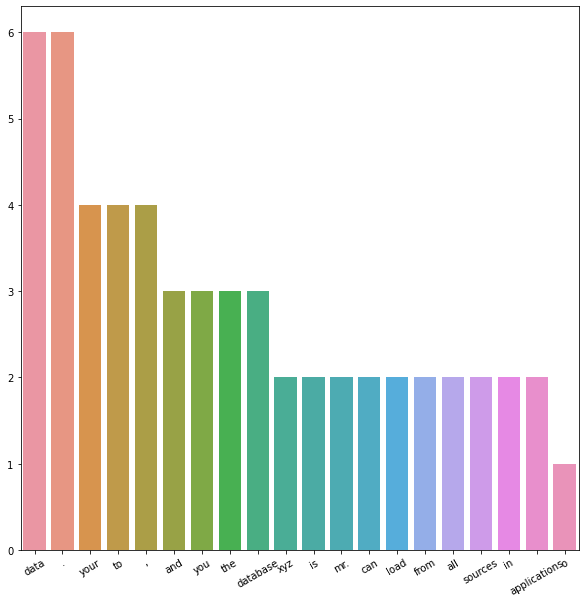

In [46]:
#Plot of features
fig, ax = plt.subplots(figsize=(10,10))
all_fdist = pd.Series(dict(fdist_top20))
pplot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
plt.xticks(rotation=30);

n-gram is a contiguous sequence of n items generated from a given sample of text where the items can be characters or words and n can be any numbers like 1,2,3, etc.

In [10]:
data_bigrams = list(nltk.bigrams(data_tokens))
data_bigrams

[('o', 'Sr.'),
 ('Sr.', 'NO'),
 ('NO', '123'),
 ('123', '-'),
 ('-', 'XYZ'),
 ('XYZ', 'Data'),
 ('Data', 'XYZ'),
 ('XYZ', 'Data'),
 ('Data', 'is'),
 ('is', 'a'),
 ('a', 'no-code'),
 ('no-code', 'and'),
 ('and', 'highly'),
 ('highly', 'intuitive'),
 ('intuitive', 'data'),
 ('data', 'pipeline'),
 ('pipeline', 'platform'),
 ('platform', '.'),
 ('.', 'was'),
 ('was', 'founded'),
 ('founded', 'by'),
 ('by', 'Mr.'),
 ('Mr.', 'Somnath'),
 ('Somnath', 'Sharma'),
 ('Sharma', '.'),
 ('.', 'You'),
 ('You', 'can'),
 ('can', 'reliably'),
 ('reliably', 'load'),
 ('load', 'data'),
 ('data', 'from'),
 ('from', 'all'),
 ('all', 'your'),
 ('your', 'sources'),
 ('sources', 'to'),
 ('to', 'the'),
 ('the', 'warehouse'),
 ('warehouse', 'in'),
 ('in', 'minutes'),
 ('minutes', '.'),
 ('.', 'It'),
 ('It', 'provides'),
 ('provides', '100+'),
 ('100+', 'ready-to-use'),
 ('ready-to-use', 'integrations'),
 ('integrations', 'across'),
 ('across', 'Databases'),
 ('Databases', ','),
 (',', 'SaaS'),
 ('SaaS', 'Applica

In [11]:
data_trigrams = list(nltk.trigrams(data_tokens ))
data_trigrams

[('o', 'Sr.', 'NO'),
 ('Sr.', 'NO', '123'),
 ('NO', '123', '-'),
 ('123', '-', 'XYZ'),
 ('-', 'XYZ', 'Data'),
 ('XYZ', 'Data', 'XYZ'),
 ('Data', 'XYZ', 'Data'),
 ('XYZ', 'Data', 'is'),
 ('Data', 'is', 'a'),
 ('is', 'a', 'no-code'),
 ('a', 'no-code', 'and'),
 ('no-code', 'and', 'highly'),
 ('and', 'highly', 'intuitive'),
 ('highly', 'intuitive', 'data'),
 ('intuitive', 'data', 'pipeline'),
 ('data', 'pipeline', 'platform'),
 ('pipeline', 'platform', '.'),
 ('platform', '.', 'was'),
 ('.', 'was', 'founded'),
 ('was', 'founded', 'by'),
 ('founded', 'by', 'Mr.'),
 ('by', 'Mr.', 'Somnath'),
 ('Mr.', 'Somnath', 'Sharma'),
 ('Somnath', 'Sharma', '.'),
 ('Sharma', '.', 'You'),
 ('.', 'You', 'can'),
 ('You', 'can', 'reliably'),
 ('can', 'reliably', 'load'),
 ('reliably', 'load', 'data'),
 ('load', 'data', 'from'),
 ('data', 'from', 'all'),
 ('from', 'all', 'your'),
 ('all', 'your', 'sources'),
 ('your', 'sources', 'to'),
 ('sources', 'to', 'the'),
 ('to', 'the', 'warehouse'),
 ('the', 'warehous

In [12]:
data_ngrams = list(nltk.ngrams(data_tokens, 5 ))
data_ngrams

[('o', 'Sr.', 'NO', '123', '-'),
 ('Sr.', 'NO', '123', '-', 'XYZ'),
 ('NO', '123', '-', 'XYZ', 'Data'),
 ('123', '-', 'XYZ', 'Data', 'XYZ'),
 ('-', 'XYZ', 'Data', 'XYZ', 'Data'),
 ('XYZ', 'Data', 'XYZ', 'Data', 'is'),
 ('Data', 'XYZ', 'Data', 'is', 'a'),
 ('XYZ', 'Data', 'is', 'a', 'no-code'),
 ('Data', 'is', 'a', 'no-code', 'and'),
 ('is', 'a', 'no-code', 'and', 'highly'),
 ('a', 'no-code', 'and', 'highly', 'intuitive'),
 ('no-code', 'and', 'highly', 'intuitive', 'data'),
 ('and', 'highly', 'intuitive', 'data', 'pipeline'),
 ('highly', 'intuitive', 'data', 'pipeline', 'platform'),
 ('intuitive', 'data', 'pipeline', 'platform', '.'),
 ('data', 'pipeline', 'platform', '.', 'was'),
 ('pipeline', 'platform', '.', 'was', 'founded'),
 ('platform', '.', 'was', 'founded', 'by'),
 ('.', 'was', 'founded', 'by', 'Mr.'),
 ('was', 'founded', 'by', 'Mr.', 'Somnath'),
 ('founded', 'by', 'Mr.', 'Somnath', 'Sharma'),
 ('by', 'Mr.', 'Somnath', 'Sharma', '.'),
 ('Mr.', 'Somnath', 'Sharma', '.', 'You'),


Chunking is used to identify parts of speech and short phrases present in a given sentence. The different parts of speech present in the given data are as follows:

In [13]:
from nltk import ne_chunk
data_tokens = word_tokenize(data)
data_tags = nltk.pos_tag(data_tokens)
data_chunks = ne_chunk(data_tags)
print(data_chunks)

(S
  o/JJ
  Sr./NNP
  NO/NNP
  123/CD
  -/:
  (ORGANIZATION XYZ/NN Data/NNP)
  XYZ/NNP
  Data/NNP
  is/VBZ
  a/DT
  no-code/JJ
  and/CC
  highly/RB
  intuitive/JJ
  data/NNS
  pipeline/NN
  platform/NN
  ./.
  was/VBD
  founded/VBN
  by/IN
  (PERSON Mr./NNP Somnath/NNP Sharma/NNP)
  ./.
  You/PRP
  can/MD
  reliably/VB
  load/NN
  data/NNS
  from/IN
  all/DT
  your/PRP$
  sources/NNS
  to/TO
  the/DT
  warehouse/NN
  in/IN
  minutes/NNS
  ./.
  It/PRP
  provides/VBZ
  100+/CD
  ready-to-use/NN
  integrations/NNS
  across/IN
  (PERSON Databases/NNP)
  ,/,
  (ORGANIZATION SaaS/NNP Applications/NNP)
  ,/,
  (PERSON Cloud/NNP Storage/NNP)
  ,/,
  (ORGANIZATION SDKs/NNP)
  ,/,
  and/CC
  (ORGANIZATION Streaming/NNP Services/NNPS)
  ./.
  You/PRP
  can/MD
  also/RB
  customized/VB
  your/PRP$
  data/NNS
  connections/NNS
  using/VBG
  (PERSON Rest/NNP API/NNP)
  and/CC
  (GPE Webhook/NNP)
  integration/NN
  to/TO
  interact/VB
  with/IN
  all/DT
  kinds/NNS
  of/IN
  applications/NNS
  ./.
 

##Method 1: From Scratch

In [14]:
import regex as re

In [15]:
opt = re.sub(r'[.|,]','', data)                  #Removing Punctuations
opt = re.sub(r'[-|\n]', '', opt)                 #Removing new line characters 
opt = re.split(' ', opt)                         #Splitting the words     
print(opt)

['oSr', 'NO', '123', '', '', 'XYZ', 'DataXYZ', 'Data', '', 'is', 'a', 'nocode', 'and', 'highly', 'intuitive', 'data', 'pipeline', 'platform', 'was', 'founded', 'by', 'Mr', 'Somnath', 'Sharma', 'You', 'can', 'reliably', 'load', 'data', 'from', 'all', 'your', 'sources', 'to', 'the', 'warehouse', 'in', 'minutes', 'It', 'provides', '100+', 'readytouse', 'integrations', 'across', 'Databases', 'SaaS', 'Applications', 'Cloud', 'Storage', 'SDKs', 'and', 'Streaming', 'Services', 'You', 'can', 'also', 'customized', 'your', 'data', 'connections', 'using', 'Rest', 'API', 'and', 'Webhook', 'integration', 'to', 'interact', 'with', 'all', 'kinds', 'of', 'applicationsThe', 'builtin', 'CDC', 'for', 'database', 'sources', 'allows', 'you', 'to', 'get', 'uptodate', 'data', 'from', 'any', 'database', 'to', 'your', 'destination', 'in', 'realtime', 'without', 'putting', 'additional', 'load', 'on', 'your', 'databaseThe', 'current', 'CEO', 'is', 'Mr', 'Pankaj', 'Gupta']


In [16]:
serial_nos = []
for word in opt:
    if (word.isdigit()) :                       #To check if the any word is numeric or not  
        serial_nos.append(word)
print(f"The serial number is: {serial_nos[0]}")        

The serial number is: 123


In [17]:
names = []
i = 0
for word in opt:
    if (word == 'Mr'):
        names.append(opt[i+1] +' ' + opt[i+2])
    i = i+1
print(names) 

['Somnath Sharma', 'Pankaj Gupta']


So, we can extract the names and the serial number from scratch but not the job designation.

#Approach 1 : Using NLTK

In [18]:
data_tokens = nltk.word_tokenize(data)                    #Spillting the data into tokens
data_tags = nltk.pos_tag(data_tokens)                     #Part of Speech Tagging 
data_chunks = nltk.ne_chunk(data_tags, binary = True)     #whether NE or not NE

In [19]:
for chunk in data_chunks:
  print(chunk)

('o', 'JJ')
('Sr.', 'NNP')
('NO', 'NNP')
('123', 'CD')
('-', ':')
(NE XYZ/NN Data/NNP)
('XYZ', 'NNP')
('Data', 'NNP')
('is', 'VBZ')
('a', 'DT')
('no-code', 'JJ')
('and', 'CC')
('highly', 'RB')
('intuitive', 'JJ')
('data', 'NNS')
('pipeline', 'NN')
('platform', 'NN')
('.', '.')
('was', 'VBD')
('founded', 'VBN')
('by', 'IN')
(NE Mr./NNP Somnath/NNP Sharma/NNP)
('.', '.')
('You', 'PRP')
('can', 'MD')
('reliably', 'VB')
('load', 'NN')
('data', 'NNS')
('from', 'IN')
('all', 'DT')
('your', 'PRP$')
('sources', 'NNS')
('to', 'TO')
('the', 'DT')
('warehouse', 'NN')
('in', 'IN')
('minutes', 'NNS')
('.', '.')
('It', 'PRP')
('provides', 'VBZ')
('100+', 'CD')
('ready-to-use', 'NN')
('integrations', 'NNS')
('across', 'IN')
(NE Databases/NNP)
(',', ',')
(NE SaaS/NNP Applications/NNP)
(',', ',')
(NE Cloud/NNP Storage/NNP)
(',', ',')
(NE SDKs/NNP)
(',', ',')
('and', 'CC')
('Streaming', 'NNP')
('Services', 'NNPS')
('.', '.')
('You', 'PRP')
('can', 'MD')
('also', 'RB')
('customized', 'VB')
('your', 'PRP$

Created a dataframe for only the named entities recognized by nltk

In [20]:
entities = []
labels = []
for chunk in data_chunks:
  if hasattr(chunk,'label'):                          #to check if the has the correct given attribute
    entities.append(' '.join(c[0] for c in chunk))
    labels.append(chunk.label())

entities_labels = list(set(zip(entities, labels)))
entities_df = pd.DataFrame(entities_labels)
entities_df.columns = ['Entities', 'labels']
entities_df

,Entities,labels
0,CEO,NE
1,Webhook,NE
2,Cloud Storage,NE
3,Mr. Pankaj Gupta,NE
4,Databases,NE
5,SDKs,NE
6,SaaS Applications,NE
7,Mr. Somnath Sharma,NE
8,Rest API,NE
9,XYZ Data,NE


Next is another dataframe with entities being organization, person and geopolitical entity. We observe that it has plenty of errors such as 'databases' considered under person and so on.

In [21]:
data_chunks = nltk.ne_chunk(data_tags, binary = False)      #either NE or not NE
entities = []
labels = []
for chunk in data_chunks:
  if hasattr(chunk,'label'):
    entities.append(' '.join(c[0] for c in chunk))
    labels.append(chunk.label())

entities_labels = list(set(zip(entities, labels)))
entities_df = pd.DataFrame(entities_labels)
entities_df.columns = ['Entities', 'labels']
entities_df

,Entities,labels
0,Streaming Services,ORGANIZATION
1,SaaS Applications,ORGANIZATION
2,Databases,PERSON
3,SDKs,ORGANIZATION
4,Rest API,PERSON
5,Mr. Somnath Sharma,PERSON
6,Webhook,GPE
7,Mr. Pankaj Gupta,PERSON
8,CEO,ORGANIZATION
9,CDC,ORGANIZATION


In [22]:
entities = []
labels = []

sentence = nltk.sent_tokenize(data)
for sent in sentence:
  for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent)), binary = False):
    if hasattr(chunk, 'label'):
      entities.append(' '.join(c[0] for c in chunk))
      labels.append(chunk.label())

entities_labels = list(set(zip(entities, labels)))
entities_df = pd.DataFrame(entities_labels)
entities_df.columns = ['Entities','Labels']
entities_df 

,Entities,Labels
0,Streaming Services,ORGANIZATION
1,SaaS Applications,ORGANIZATION
2,Databases,PERSON
3,SDKs,ORGANIZATION
4,Rest API,PERSON
5,Mr. Somnath Sharma,PERSON
6,Webhook,GPE
7,Mr. Pankaj Gupta,PERSON
8,CEO,ORGANIZATION
9,CDC,ORGANIZATION


In our last dataframe, we observe the people being classified rightly with their job designations being under 'organizatio' entity. This is moderately good as it still has errors which we will try to remove with spacy.

#Approach 2: Using Spacy

In [23]:
spacy.__version__

'2.2.4'

In [24]:
nlp = spacy.load('en_core_web_sm')

In [25]:
data = nlp(data)
entities = []
labels = []
pos_start = []
pos_end = []

for ent in data.ents:
  entities.append(ent)
  labels.append(ent.label_)
  pos_start.append(ent.start_char)
  pos_end.append(ent.end_char)

df = pd.DataFrame({'Entities':entities, 'Labels':labels, 'Position Start':pos_start
                   , 'Position End': pos_end})
df

,Entities,Labels,Position Start,Position End
0,(123),CARDINAL,9,12
1,"(XYZ, Data)",ORG,25,33
2,"(Somnath, Sharma)",PERSON,112,126
3,(minutes),TIME,197,204
4,(100),CARDINAL,218,221
5,(Databases),PRODUCT,256,265
6,(Applications),ORG,272,284
7,"(Streaming, Services)",ORG,311,329
8,"(Rest, API)",WORK_OF_ART,383,391
9,(CDC),ORG,474,477


In spacy, we keep a track of the entities' startig and ending positions aswell. We get both the cardinals as preferred and the people correctly classified aswell along with its designation. XYZ Data beig classified under Organization whu=ich was not the case for nltk.

In [26]:
df[df["Labels"]=="PERSON"]

,Entities,Labels,Position Start,Position End
2,"(Somnath, Sharma)",PERSON,112,126
10,"(Pankaj, Gupta)",PERSON,657,669


For visualizing the entities in data:

In [27]:
displacy.serve(data,style = 'ent')

Shutting down server on port 5000.


In [28]:
spacy.displacy.serve(data, style = 'ent')


Using the 'ent' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


#Stanford NER

In [ ]:
pip install stanza

In [30]:
import stanza

In [31]:
data = """o
Sr. NO 123  - XYZ Data
XYZ Data  is a no-code and highly intuitive data pipeline platform. was founded by Mr. Somnath Sharma. You can reliably load data from all your sources to the warehouse in minutes. It provides 100+ ready-to-use integrations across Databases, SaaS Applications, Cloud Storage, SDKs, and Streaming Services. You can also customized your data connections using Rest API and Webhook integration to interact with all kinds of applications.

The built-in CDC for database sources allows you to get up-to-date data from any database to your destination in real-time without putting additional load on your database.
The current CEO is Mr. Pankaj Gupta
"""

In [32]:
stanza.download('en')
nlp = stanza.Pipeline('en')

2022-04-04 12:28:28 INFO: Downloading default packages for language: en (English)...


2022-04-04 12:28:56 INFO: Finished downloading models and saved to /root/stanza_resources.
2022-04-04 12:28:56 INFO: Loading these models for language: en (English):
| Processor    | Package   |
----------------------------
| tokenize     | combined  |
| pos          | combined  |
| lemma        | combined  |
| depparse     | combined  |
| sentiment    | sstplus   |
| constituency | wsj       |
| ner          | ontonotes |

2022-04-04 12:28:56 INFO: Use device: cpu
2022-04-04 12:28:56 INFO: Loading: tokenize
2022-04-04 12:28:56 INFO: Loading: pos
2022-04-04 12:28:57 INFO: Loading: lemma
2022-04-04 12:28:57 INFO: Loading: depparse
2022-04-04 12:28:58 INFO: Loading: sentiment
2022-04-04 12:29:00 INFO: Loading: constituency
2022-04-04 12:29:02 INFO: Loading: ner
2022-04-04 12:29:04 INFO: Done loading processors!


In [33]:
doc = nlp(data)

In [34]:
for ent in doc.entities:
  print(f"{ent.text} : {ent.type}")

123 : CARDINAL
Somnath Sharma : PERSON
minutes : TIME
100 : CARDINAL
Databases : ORG
SaaS Applications : PRODUCT
Cloud Storage : PRODUCT
SDKs : ORG
Streaming Services : ORG
Rest API : PRODUCT
Webhook : PRODUCT
CDC : ORG
Pankaj Gupta : PERSON


This a better estimation of the entities compared to the rest as we've gotten our cardinals, person and Organization(along with job designation) right on point.